# *Simple Linear Regression*

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 1 - Data Ingestion

In [4]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### PROFIT ~ RND
### PROFIT_pred = B0 + B1*RND
### Least square error model

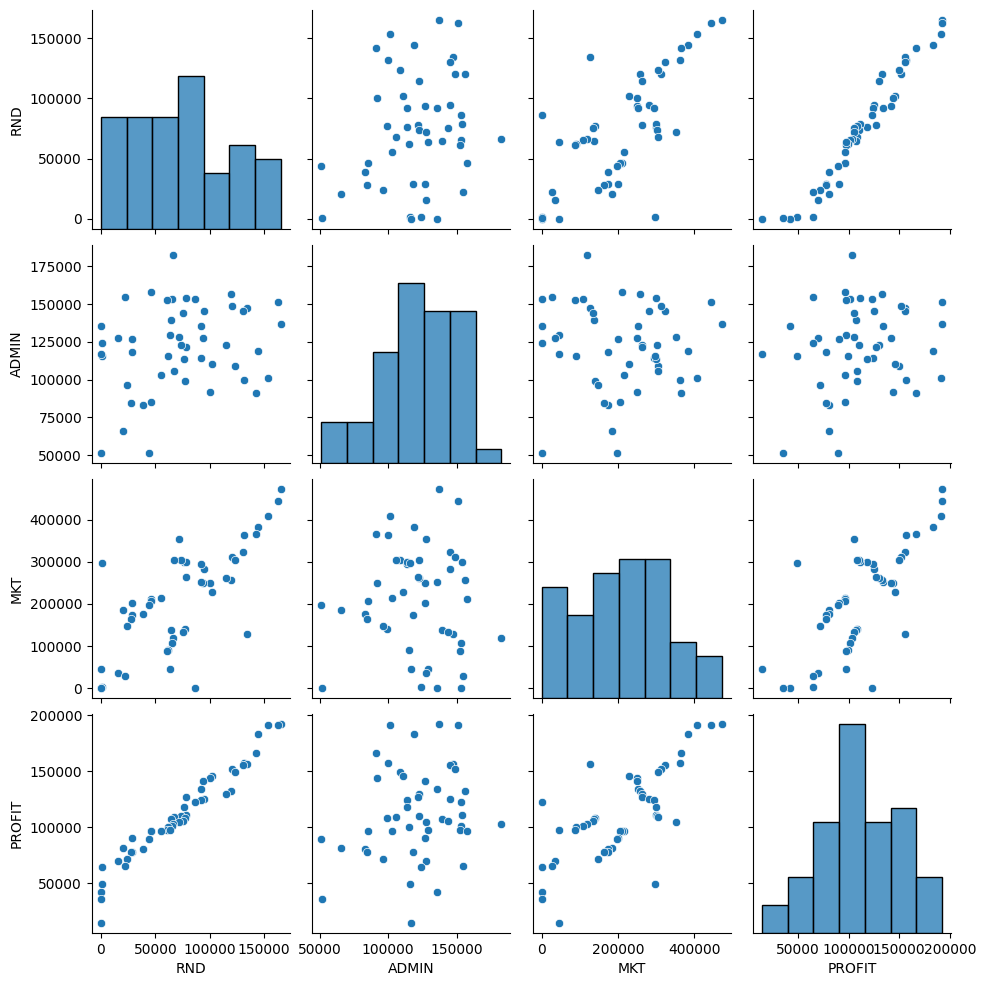

In [7]:
import seaborn as sns
sns.pairplot(df)

## step 2 -> Perform basic data quality checks

In [6]:
df.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

## Step 3 -> Seperate X(RND)  and  Y(PROFIT)

In [12]:
X = df[['RND']]
Y = df[['PROFIT']]

In [13]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [15]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Step 4 -> Build the linear regression model

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

## PROFIT = B0 + B1*RND
## B0 - Intercept
## B1 - Slope / Coefficient

In [17]:
model.intercept_

array([49032.89914125])

In [18]:
model.coef_

array([[0.85429137]])

## PROFIT_pred = 49032.9 + 0.8542*RND
### If RND increases by 1 unit profit will increase by 0.8542
### If RND budget is 0 the profit is 49032.9 on an average


## step 5-> Model Evaluation

In [19]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [20]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [21]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

In [22]:
def evaluate_model(model, x, y):
    # Predict the results on x
    ypred = model.predict(x)
    
    # Evaluate all metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2 = r2_score(y, ypred)
    
    # Print above results
    print(f'RMSE :{rmse:.2f}')
    print(f'MAE :{mae:.2f}')
    print(f'MAPE:{mape:.2%}')
    print(f'R2_Score : {r2:.2%}')

In [23]:
evaluate_model(model, X, Y)

RMSE :9226.10
MAE :6910.98
MAPE:11.07%
R2_Score : 94.65%


## From above R2 Score > 80% hence model is good 
### Visualizing straight line fit

<Axes: xlabel='RND', ylabel='PROFIT'>

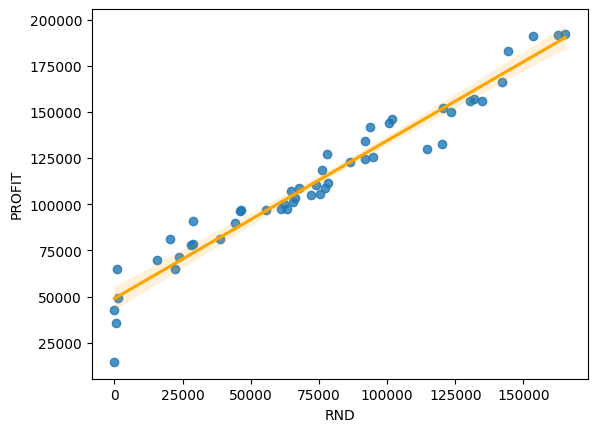

In [25]:
sns.regplot(data = df, x = 'RND', y = 'PROFIT', line_kws={'color':'orange'})

## Step 5 -> out of sample prediction

In [26]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [29]:
rnd = 2_00_000
pred = model.predict([[rnd]])
pred

array([[219891.17332901]])